# Projeto 2 - CDados

### Autores: Diego Guimarães Nuñez, Felipe Bakowski Nantes de Souza, Gustavo de Lima Mota

### Tema: Conseguimos prever o número de homicídios totais das cidades que não são capital por ano, no estado de São Paulo?

### Features: IDH por município, Proporção de crianças (6-14 anos) fora da escola, Proporção de vulnerabilidade socioeconêmica, Proporção de pessoas sem água e esgoto, e Índice de Gini por município.

In [20]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

### Baixando as bases de dados utilizadas no projeto:

In [2]:
homicidio = bd.read_table(dataset_id='br_sp_gov_ssp',
table_id='ocorrencias_registradas',
billing_project_id="cdadosp2-404421")

Downloading: 100%|██████████| 153876/153876 [00:37<00:00, 4067.68rows/s]


In [3]:
homicidio

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2002,1,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,21,0
1,2002,2,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,32,0
2,2002,3,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,36,0
3,2002,4,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,45,0
4,2002,5,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153871,2020,8,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
153872,2020,9,3500105,Presidente Prudente,0,0,0,0,0,0,...,2,1,1,0,0,0,0,0,12,1
153873,2020,10,3500105,Presidente Prudente,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,12,0
153874,2020,11,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,16,0


In [4]:
ivs = bd.read_table(dataset_id='br_ipea_avs',
table_id='municipio',
billing_project_id="cdadosp2-404421")

Downloading: 100%|██████████| 319681/319681 [07:04<00:00, 752.84rows/s] 


In [5]:
ivs # colunas que serão usadas para feature: "ivs", "ivs_infraestrutura_urbana", "ivs_capital_humano" e "ivs_renda_trabalho"
# índice de vulnerabilidade social.

,ano,sigla_uf,id_municipio,raca_cor,sexo,localizacao,ivs,ivs_infraestrutura_urbana,ivs_capital_humano,ivs_renda_trabalho,...,populacao_15_mais,populacao_15_17,populacao_15_24,populacao_16_18,populacao_18_mais,populacao_18_20,populacao_18_24,populacao_19_21,populacao_25_mais,populacao_65_mais
0,2000,AC,1200013,branco,total,total,0.652,0.631,0.778,0.546,...,1135,111,314,92,1024,66,203,69,821,55
1,2000,AC,1200104,branco,total,total,0.538,0.412,0.727,0.473,...,2506,291,812,239,2215,196,521,200,1694,179
2,2000,AC,1200203,branco,total,total,0.620,0.613,0.720,0.527,...,13485,1619,5350,1963,11867,1875,3731,1641,8136,857
3,2000,AC,1200252,branco,total,total,0.594,0.596,0.631,0.556,...,1560,170,488,160,1389,129,318,109,1072,98
4,2000,AC,1200302,branco,total,total,0.799,0.795,0.897,0.704,...,6553,937,2573,833,5616,859,1637,817,3980,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319676,2010,MG,3150539,branco,mulher,rural,NaN,NaN,NaN,NaN,...,10,0,0,0,10,0,0,0,10,0
319677,2010,MG,3165537,branco,mulher,rural,NaN,NaN,NaN,NaN,...,21,0,0,0,21,0,0,0,21,0
319678,2010,MG,3168705,total,mulher,rural,NaN,NaN,NaN,NaN,...,38,0,0,0,38,0,0,0,38,0
319679,2010,MG,3115508,negro,mulher,rural,NaN,NaN,NaN,NaN,...,77,0,14,0,77,0,14,0,63,0


In [6]:
ivs.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'raca_cor', 'sexo', 'localizacao',
       'ivs', 'ivs_infraestrutura_urbana', 'ivs_capital_humano',
       'ivs_renda_trabalho', 'idhm', 'idhm_l', 'idhm_e', 'idhm_r',
       'idhm_subescolaridade', 'idhm_subfrequencia', 'prosperidade_social',
       'proporcao_vulnerabilidade_socioeconomica', 'propocao_energia_eletrica',
       'proporcao_domicilio_densidade', 'proporcao_sem_agua_esgoto',
       'proporcao_sem_coleta', 'renda_per_capita', 'renda_media_18_mais',
       'proporcao_sem_renda_18_mais', 'renda_trabalho',
       'renda_per_capita_vulneravel', 'proporcao_vulneravel',
       'populacao_vulneravel_15_24', 'proporcao_vulneravel_dependente_idoso',
       'populacao_vulneravel_e_idoso', 'razao_dependencia',
       'fecundidade_total', 'taxa_envelhecimento', 'mortalidade_1_menos',
       'proporcao_mortalidade_5_menos', 'proporcao_crianca_fora_escola_0_5',
       'proporcao_escola_5_6', 'proporcao_crianca_fora_escola_6_14',
       'proporca

## Refletindo sobre os problemas sociais presentes em São Paulo, um dos mais notáveis é a abundante taxa de criminalidade, especificando ainda mais, a taxa de homicídio. Visado a target (problema o qual é pretendido visualizar), foi-se pensado em possíveis targets quais estão ligadas com o tema tido em vista, que são: Índice de Gini, Indice de desenvolvimento Humano, Proporcao de populacao sem esgoto, Proporcao de crianças que sairam da escola entre 6 a 14 anos e Proporcao de Vulnerabilidade Socioeconomica.
## Tendo em vista a target com suas respectivas features, é pretendido realizar a criação de um modelo com capacidade de previsão para a criminalidade, entendendo intrinsicamente as relações individuais de cada feature com a target. A partir da criação do modelo, é facilitada a visão das 'raízes' do problema, possibilitando possíveis tomadas de decisões pessoais e governamentais para tratar esse severo problema.

#### Primeiramente, vamos tratar a base de dados de homicidios e deixá-la mais visualizável

In [7]:
homicidio['Homicidio_total'] = homicidio.loc[:, ['homicidio_doloso', 'homicidio_culposo_outros']].sum(axis=1) #homicidio total
homicidio = homicidio.loc[(homicidio['ano'] == 2010)]
homicidio_filtrado = homicidio.loc[:,('ano','id_municipio', 'regiao_ssp', 'Homicidio_total')] #selecionando colunas

In [8]:
homicidio_ano = homicidio_filtrado.groupby(['ano', 'id_municipio', 'regiao_ssp']).agg({'Homicidio_total': 'sum'}).reset_index()
homicidio_ano

,ano,id_municipio,regiao_ssp,Homicidio_total
0,2010,3500105,Presidente Prudente,1.0
1,2010,3500204,São José do Rio Preto,1.0
2,2010,3500303,Piracicaba,1.0
3,2010,3500402,Piracicaba,2.0
4,2010,3500501,Campinas,0.0
...,...,...,...,...
635,2010,3557006,Sorocaba,6.0
636,2010,3557105,São José do Rio Preto,12.0
637,2010,3557154,São José do Rio Preto,0.0
638,2010,3557204,Bauru,1.0


 ## Agora devemos tratar a base IVS, para que, consigamos utilizar as colunas:  Prop_crianca_fora_escola_6_14, IDHM (IDH por municipio), Proporção_vulnerabilidade_socioeconomica (proporção de pessoas com renda per capita inferior a meio salario mínimo e que gastam mais de uma hora até chegar no trabalho), proporção_sem_agua_esgoto, Índice de Gini

In [9]:
ivs_filtrado = ivs.loc[:,('ano','id_municipio','sigla_uf','idhm','proporcao_crianca_fora_escola_6_14','proporcao_vulnerabilidade_socioeconomica', 'proporcao_sem_agua_esgoto','indice_gini')]
ivs_t = ivs_filtrado.loc[(ivs['sigla_uf'] == 'SP') & (ivs['ano'] == 2010)]

In [10]:
ivs_novo = ivs_t.dropna()
ivs_novo2 = ivs_novo.drop_duplicates(subset='id_municipio', keep = 'first')
ivs_novo2

,ano,id_municipio,sigla_uf,idhm,proporcao_crianca_fora_escola_6_14,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini
202185,2010,3500105,SP,0.819,1.81,2.38,0.00,0.52
202186,2010,3500204,SP,0.735,1.51,5.45,0.00,0.39
202187,2010,3500303,SP,0.742,3.70,9.76,0.49,0.51
202188,2010,3500709,SP,0.774,2.94,14.06,0.00,0.41
202189,2010,3500758,SP,0.736,0.60,2.68,0.61,0.44
...,...,...,...,...,...,...,...,...
202825,2010,3554805,SP,0.799,1.32,7.63,0.83,0.53
202826,2010,3555406,SP,0.781,2.64,3.00,1.50,0.62
203604,2010,3504701,SP,0.669,1.09,8.62,0.00,0.38
203630,2010,3507209,SP,0.745,5.35,13.75,7.19,0.40


In [11]:
tabela_final = pd.merge(ivs_novo2, homicidio_ano[['id_municipio', 'Homicidio_total']], on='id_municipio', how='left')
tabela_definitiva = tabela_final.dropna()
tabela_definitiva

,ano,id_municipio,sigla_uf,idhm,proporcao_crianca_fora_escola_6_14,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini,Homicidio_total
0,2010,3500105,SP,0.819,1.81,2.38,0.00,0.52,1.0
1,2010,3500204,SP,0.735,1.51,5.45,0.00,0.39,1.0
2,2010,3500303,SP,0.742,3.70,9.76,0.49,0.51,1.0
3,2010,3500709,SP,0.774,2.94,14.06,0.00,0.41,3.0
4,2010,3500758,SP,0.736,0.60,2.68,0.61,0.44,0.0
...,...,...,...,...,...,...,...,...,...
640,2010,3554805,SP,0.799,1.32,7.63,0.83,0.53,7.0
641,2010,3555406,SP,0.781,2.64,3.00,1.50,0.62,21.0
642,2010,3504701,SP,0.669,1.09,8.62,0.00,0.38,1.0
643,2010,3507209,SP,0.745,5.35,13.75,7.19,0.40,0.0


In [12]:
tabela_definitiva.loc[tabela_definitiva['Homicidio_total']==1260] # identificando São Paulo

,ano,id_municipio,sigla_uf,idhm,proporcao_crianca_fora_escola_6_14,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini,Homicidio_total
600,2010,3550308,SP,0.856,3.61,38.37,0.27,0.62,1260.0


In [22]:
tabela_sem_sp = tabela_definitiva.drop(tabela_definitiva.loc[tabela_definitiva['Homicidio_total']==1260].index) # tirando São Paulo

## Tabela definitiva criada!



# Plotando os gráficos de dispersão + .corr

In [14]:
tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['proporcao_sem_agua_esgoto'])

-0.010025408501639741

In [15]:
tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['indice_gini'])

0.2563769185726429

Correlação entre homicídios e idhm é moderada e possui valor de 0.34710784904414727
Correlação entre homicídios e prop. de crianças fora da escola é fraca e possui valor de 0.14312836258383912
Correlação entre homicídios e prop. de pessoas vulneráveis é moderada e possui valor de 0.3055148426790926
Correlação entre homicídios e prop. de pessoas sem esgoto é fraca e possui valor de -0.010025408501639741
Correlação entre homicídios e indice gini é fraca e possui valor de 0.2563769185726429


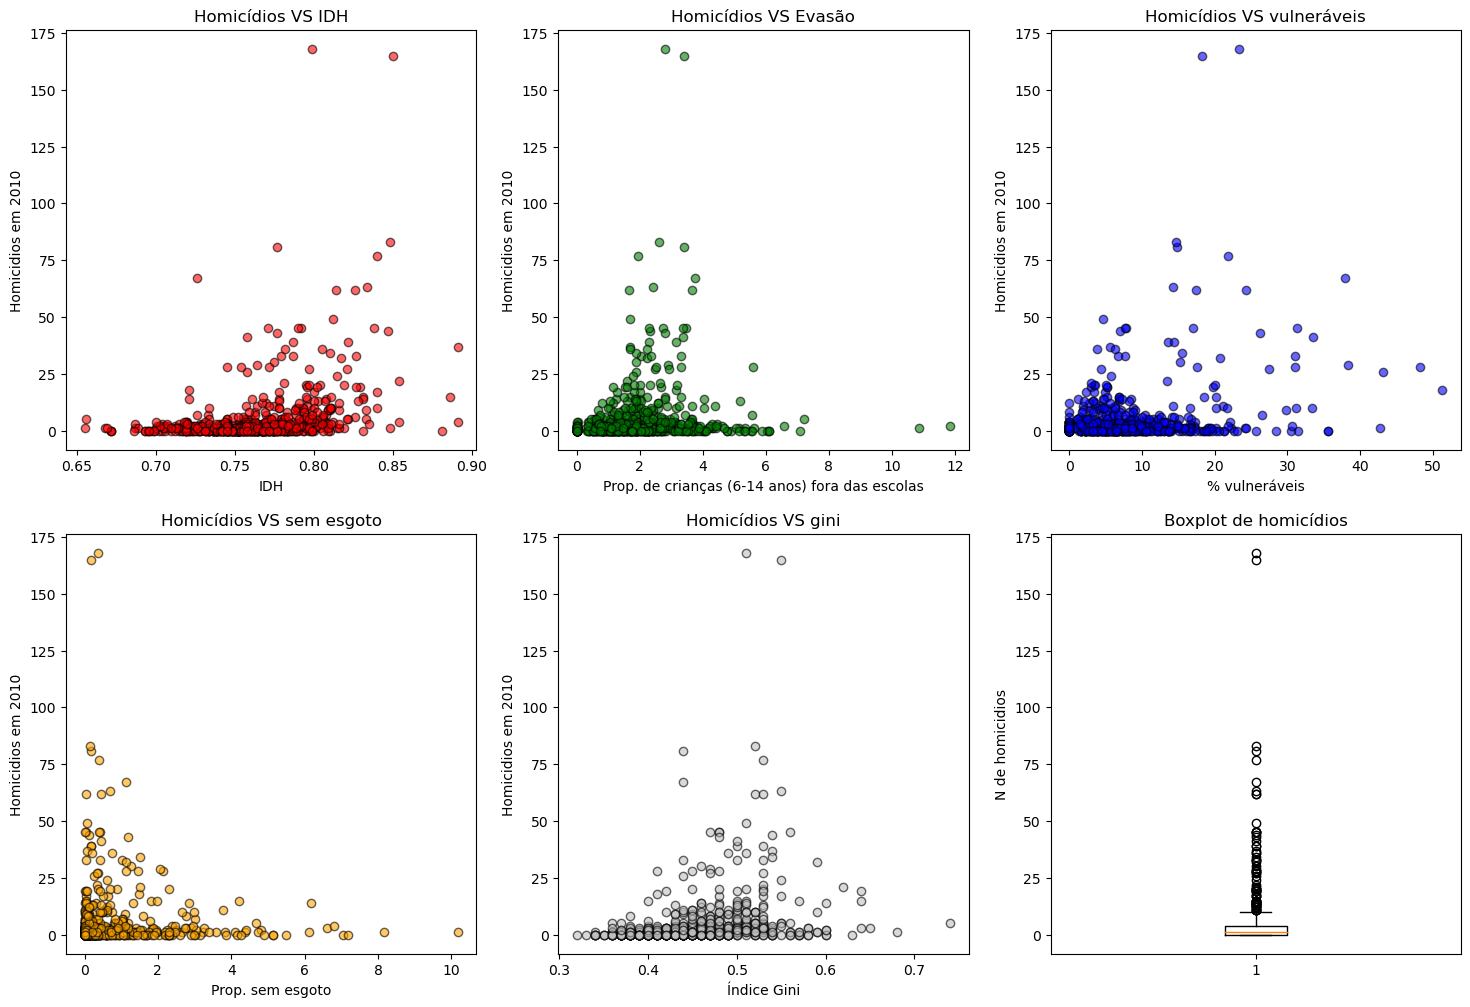

In [19]:
plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
plt.scatter(tabela_sem_sp['idhm'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='red', edgecolors="black")
plt.xlabel('IDH')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS IDH')
corr_idhm = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['idhm'])
if abs(corr_idhm) < 0.3:
    print(f'Correlação entre homicídios e idhm é fraca e possui valor de {corr_idhm}')
elif abs(corr_idhm) >0.3 and (corr_idhm) < 0.7:
    print(f'Correlação entre homicídios e idhm é moderada e possui valor de {corr_idhm}')
elif abs(corr_idhm) > 0.7:
    print(f'Correlação entre homicídios e idhm é forte e possui valor de {corr_idhm}')

plt.subplot(2,3,2)
plt.scatter(tabela_sem_sp['proporcao_crianca_fora_escola_6_14'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='green', edgecolors="black")
plt.xlabel('Prop. de crianças (6-14 anos) fora das escolas')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS Evasão')
corr_crianca = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['proporcao_crianca_fora_escola_6_14'])
if abs(corr_crianca) < 0.3:
    print(f'Correlação entre homicídios e prop. de crianças fora da escola é fraca e possui valor de {corr_crianca}')
elif abs(corr_crianca) >0.3 and (corr_crianca) < 0.7:
    print(f'Correlação entre homicídios e prop. de crianças fora da escola é moderada e possui valor de {corr_crianca}')
elif abs(corr_crianca) > 0.7:
    print(f'Correlação entre homicídios e prop. de crianças fora da escola é forte e possui valor de {corr_crianca}')

plt.subplot(2,3,3)
plt.scatter(tabela_sem_sp['proporcao_vulnerabilidade_socioeconomica'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='blue', edgecolors="black")
plt.xlabel('% vulneráveis')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS vulneráveis')
corr_vul = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['proporcao_vulnerabilidade_socioeconomica'])
if abs(corr_vul) < 0.3:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é fraca e possui valor de {corr_vul}')
elif abs(corr_vul) >0.3 and (corr_vul) < 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é moderada e possui valor de {corr_vul}')
elif abs(corr_vul) > 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é forte e possui valor de {corr_vul}')

plt.subplot(2,3,4)
plt.scatter(tabela_sem_sp['proporcao_sem_agua_esgoto'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='Orange', edgecolors="black")
plt.xlabel('Prop. sem esgoto')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS sem esgoto')
corr_esg = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['proporcao_sem_agua_esgoto'])
if abs(corr_esg) < 0.3:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é fraca e possui valor de {corr_esg}')
elif abs(corr_esg) >0.3 and (corr_esg) < 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é moderada e possui valor de {corr_esg}')
elif abs(corr_esg) > 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é forte e possui valor de {corr_esg}')

plt.subplot(2,3,5)
plt.scatter(tabela_sem_sp['indice_gini'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='silver', edgecolors="black")
plt.xlabel('Índice Gini')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS gini')
corr_gini = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['indice_gini'])
if abs(corr_gini) < 0.3:
    print(f'Correlação entre homicídios e indice gini é fraca e possui valor de {corr_gini}')
elif abs(corr_gini) >0.3 and (corr_gini) < 0.7:
    print(f'Correlação entre homicídios e indice gini é moderada e possui valor de {corr_gini}')
elif abs(corr_gini) > 0.7:
    print(f'Correlação entre homicídios e indice gini é forte e possui valor de {corr_gini}')

plt.subplot(2,3,6)
plt.boxplot(tabela_sem_sp['Homicidio_total'])
plt.title('Boxplot de homicídios')
plt.ylabel('N de homicidios')

plt.show()

## Possíveis fontes de erro!

### Ao analisarmos a função .agg observamos que ela fazia com que existisse alguns pontos aberrantes, por exemplo, em sp tinhamos 1260 homicídios. Logo, tiramos esse ponto aberrante e trabalharemos com essa possibilidade de erro para as próximas análises